In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
country = pd.read_csv("Countries.csv")

In [4]:
display(country.head())

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [5]:
country.shape

(241, 3)

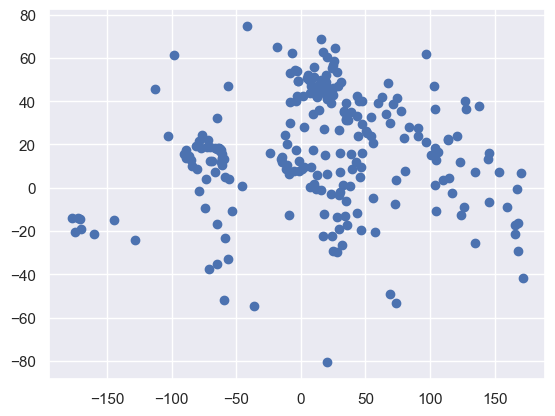

In [6]:
plt.scatter(country['Longitude'], country['Latitude'])


In [7]:
cluster_data = country.iloc[:,[1,2]]

In [8]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [9]:
ss=StandardScaler()
cluster_data=pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [10]:
k=KMeans(4)

In [11]:
k.fit(cluster_data)

KMeans(n_clusters=4)

In [29]:
i_cluster=k.fit_predict(cluster_data)

In [31]:
i_cluster

array([1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 1, 3, 2, 3, 1, 2, 0, 0, 3, 0, 3, 3,
       2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 0, 3, 0, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 0, 0, 0, 3, 3, 1, 1, 3, 0, 1, 0, 1,
       2, 1, 2, 3, 1, 0, 1, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 3, 0, 2, 1, 1, 2, 0, 0, 2, 0, 3, 0, 1, 0, 2, 3, 0, 0, 0,
       2, 1, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 3, 0, 1, 3, 3, 2,
       3, 2, 0, 2, 3, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 2, 3, 3, 2, 3, 1, 0, 3,
       3, 0, 0, 3, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 3, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 3, 3, 3])

In [33]:
new_country=country.copy()
new_country.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [37]:
new_country['clusterNo']=i_cluster
new_country.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


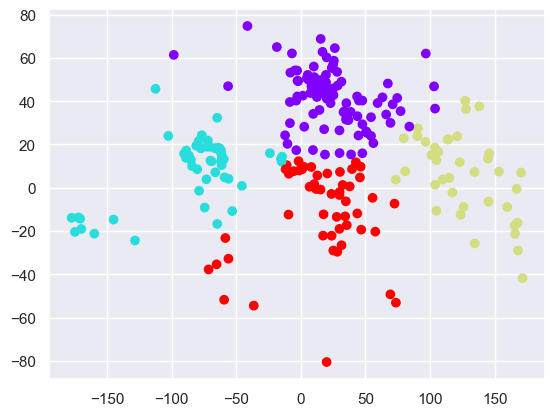

In [41]:
plt.scatter(new_country['Longitude'], new_country['Latitude'],c=new_country['clusterNo'],cmap='rainbow')

In [47]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)


Text(0, 0.5, 'Within-cluster Sum of Squares')

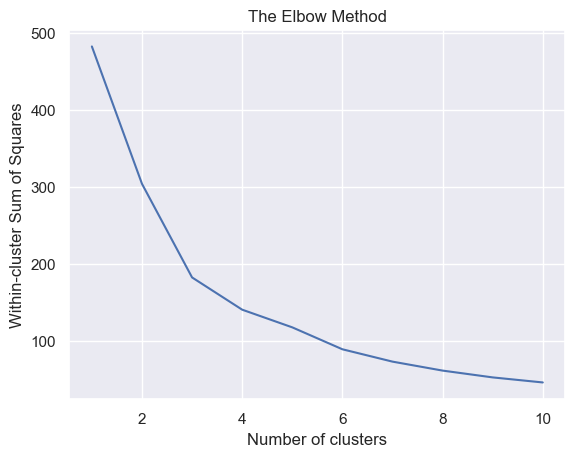

In [49]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')